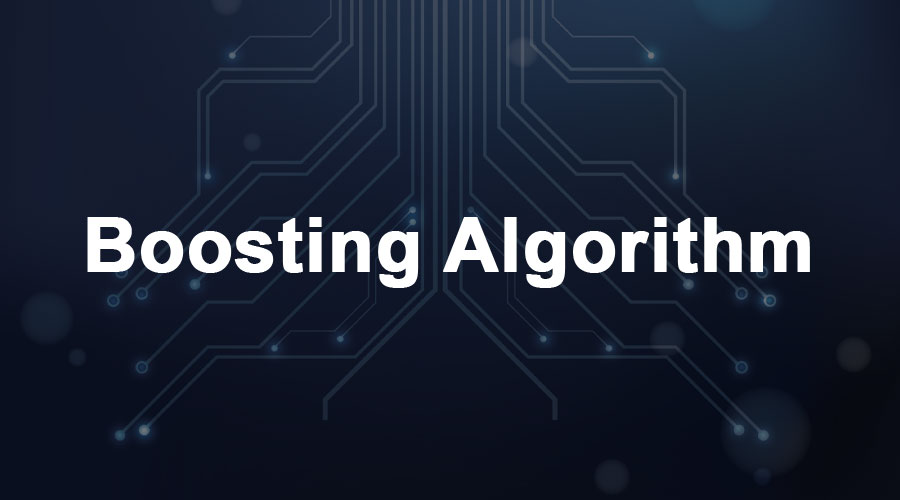

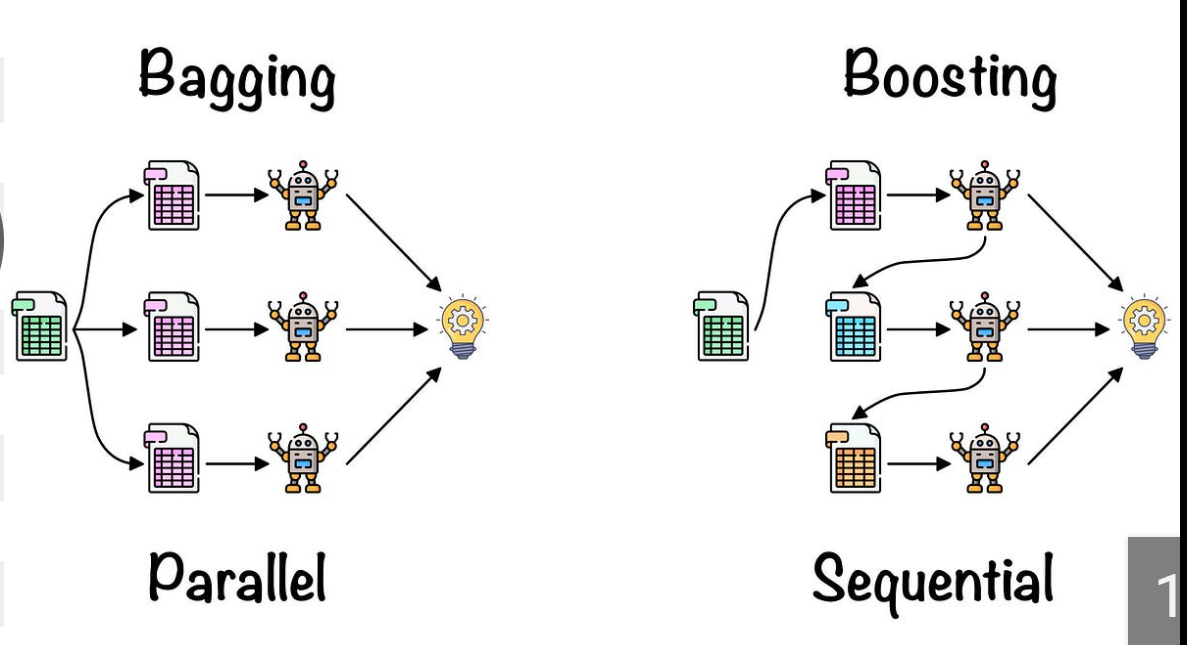

# 1. Introduction to Boosting

**Boosting is a machine learning technique that combines multiple weak learners to form a strong learner.**

Weak Learner: A model that performs slightly better than random guessing (e.g., a small decision tree).

Boosting builds these models sequentially, correcting the errors of the previous models to improve accuracy.

Think of it as a teacher (boosting algorithm) helping a group of students (weak learners) improve step by step.



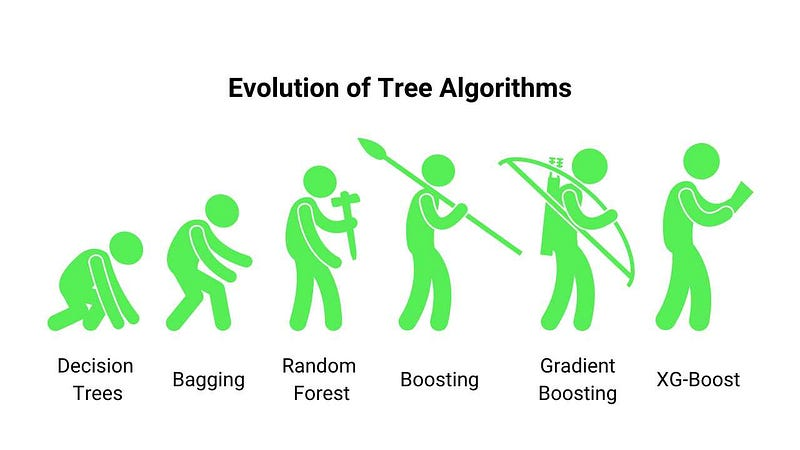

# 2. AdaBoost (Adaptive Boosting)

**What is AdaBoost?**

AdaBoost is one of the earliest boosting algorithms.
It combines multiple weak learners, like decision stumps (a tree with just one split).

Each learner focuses on correcting the mistakes of the previous one by assigning more weight to misclassified points.

**A Decision Stump is a very simple type of decision tree. It is a tree with only one split (one level deep). This means it makes a decision based on just one feature and then stops.**

**How It Works:**

Start with a weak model and train it on the dataset.

Increase the weight of misclassified points so the next model focuses on these points.

Add all models together with weights based on their accuracy.

**Advantages:**

Simple and easy to implement.

Works well with clean datasets (less noise).

**When to Use:**

For smaller datasets and binary classification problems.

When you want a simple yet effective boosting method.


#3. Gradient Boosting

**What is Gradient Boosting?**

Gradient Boosting is an improvement over AdaBoost.

It builds models sequentially, but instead of focusing on misclassified points, it minimizes a loss function (e.g., Mean Squared Error for regression).

Think of it as gradually climbing down a hill (minimizing error) step by step.

**How It Works:**

Start with an initial weak model (e.g., predicting the mean in regression).

Calculate the error (residual) between the predictions and actual values.

Train the next model to predict the residuals (errors).

Add these models together to make the final prediction.

**Advantages:**

Can handle noisy datasets better than AdaBoost.

Works well for regression and classification problems.

**When to Use:**

When you have more complex problems where AdaBoost struggles.

For tasks where minimizing the loss function is crucial.


#4. XGBoost (Extreme Gradient Boosting)

**What is XGBoost?**

XGBoost is an advanced version of Gradient Boosting.

It is optimized for speed and performance, making it one of the most popular algorithms in machine learning competitions (e.g., Kaggle).

**How It Works:**

Similar to Gradient Boosting, but includes advanced techniques like:

Regularization: Reduces overfitting by penalizing complex models.

Parallel Processing: Trains models faster.

Tree Pruning: Avoids overgrown trees for better generalization.

**Advantages:**

Very fast and efficient, even with large datasets.

Handles missing data automatically.

Offers high accuracy in most scenarios.

**When to Use:**

For large datasets with many features.

When speed and performance are critical.

#5. Comparison of Algorithms

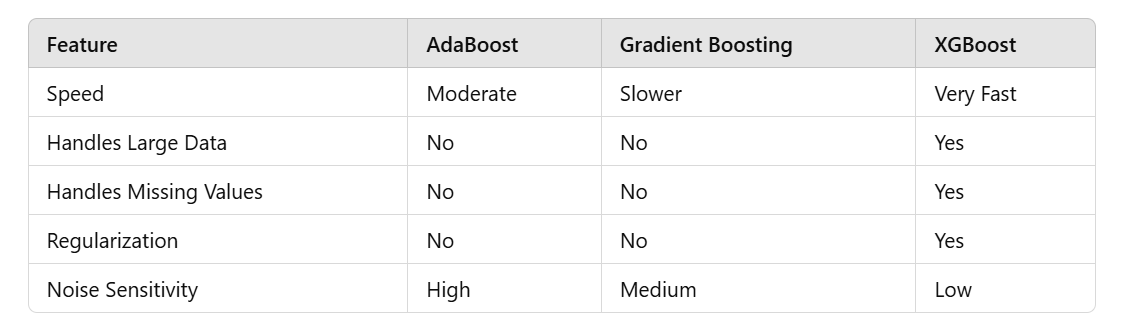


#6. Advantages of Boosting in General

Improves accuracy by combining multiple models.

Works well with structured/tabular data.

Reduces bias and variance.

#7. When to Use Boosting Algorithms

When simpler models (like Decision Trees or Linear Regression) don’t perform well.

For problems requiring high accuracy.

For competitions and real-world applications where performance matters.

#8. Limitations

Can overfit if not tuned properly.

Computationally expensive (except XGBoost).

May struggle with noisy datasets (especially AdaBoost).

#9. Real-Life Applications

Fraud detection (e.g., credit card fraud).

Customer segmentation.

Predicting loan defaults.

Recommendation systems.

# Handson

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("census-income .csv")
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
#print(df.to_string())

In [ ]:
# Replace the ? to a null value
df.replace("?" , np.nan , inplace=True)

In [ ]:
df.isnull().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
print(df.duplicated().sum())

23


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
print(df.duplicated().sum())

0


In [ ]:
# Clean data

df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
# Perform Label encoding to convert all categorical column to numerical column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for i in df.columns:
  if df[i].dtype=="object": # Perform encoding in all object data type columns
    df[i]=le.fit_transform(df[i])

In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [ ]:
x=df.drop("annual_income",axis=1)
y=df["annual_income"]

In [ ]:
x

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,38
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,38
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,38
32559,22,2,201490,11,9,4,0,3,4,1,0,0,20,38


In [ ]:
y

,annual_income
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,1
32558,0
32559,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size=0.3 , random_state = 42 , stratify=y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
print("Accuracy score of Random forest model is :", accuracy_score(y_pred , y_test)*100)

Accuracy score of Random forest model is : 85.67794735677947


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
print("Accuracy score of AdaBoostClassifier model is :", accuracy_score(y_pred , y_test)*100)

Accuracy score of AdaBoostClassifier model is : 84.63835434638355


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
print("Accuracy score of GradientBoostingClassifier model is :", accuracy_score(y_pred , y_test)*100)

Accuracy score of GradientBoostingClassifier model is : 86.03185136031851


In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
print("Accuracy score of XGBClassifier model is :", accuracy_score(y_pred , y_test)*100)

Accuracy score of XGBClassifier model is : 86.44105286441052


In [ ]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
print("Accuracy score of LightGBM model is :", accuracy_score(y_pred , y_test)*100)

[LightGBM] [Info] Number of positive: 5254, number of negative: 15843
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 21097, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.249040 -> initscore=-1.103738
[LightGBM] [Info] Start training from score -1.103738
Accuracy score of LightGBM model is : 86.92767086927671


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
print("Testing accuracy score of Decision tree model is :", accuracy_score(y_pred , y_test))

Testing accuracy score of Decision tree model is : 0.803251493032515


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train , y_train)
y_pred = model.predict(x_train)
print("Training accuracy score of Decision tree model is :", accuracy_score(y_pred , y_train))

Training accuracy score of Decision tree model is : 1.0
